In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Python\Folds5x2_pp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


<font color="green">
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Average Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.


Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.
Lets change the column names with its more understandable fashion as follows:

In [3]:
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## 1. EXPLORATORY DATA ANALYSIS

## 1.1. Dealing With the Missing Values:

<font color="green">
There is no any missing value in the data set as seen below:

In [4]:
df.isnull().sum()

Average Temperature                    0
Exhaust Vacuum                         0
Ambient Pressure                       0
Relative Humidity                      0
Net Hourly Electrical Energy Output    0
dtype: int64

## 1.1. Descriptive Statistical Data Analysis

<font color="green">
All the values are numerical and continuous values,so there is not need to transform the data into numerical values as seen below:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Average Temperature                  9568 non-null   float64
 1   Exhaust Vacuum                       9568 non-null   float64
 2   Ambient Pressure                     9568 non-null   float64
 3   Relative Humidity                    9568 non-null   float64
 4   Net Hourly Electrical Energy Output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


<font color="green">
We can see all the statistical information for all features and the target column below:

In [6]:
df.describe()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
df.corr()["Net Hourly Electrical Energy Output"].sort_values(ascending=False)

Net Hourly Electrical Energy Output    1.000000
Ambient Pressure                       0.518429
Relative Humidity                      0.389794
Exhaust Vacuum                        -0.869780
Average Temperature                   -0.948128
Name: Net Hourly Electrical Energy Output, dtype: float64

<font color="green">
As seen above there is strong positive correlation between Net Hourly Electrical Energy Output and Ambient Pressure while very strong negative correlation between Net Hourly Electrical Energy Output and Average Temperature or Exhaust Vacuum. Lets visualize this correlation with seaborn heatmap below:

In [9]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 467.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 467.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 370.8 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 403.5 kB/s eta 0:00:01
   --------------


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

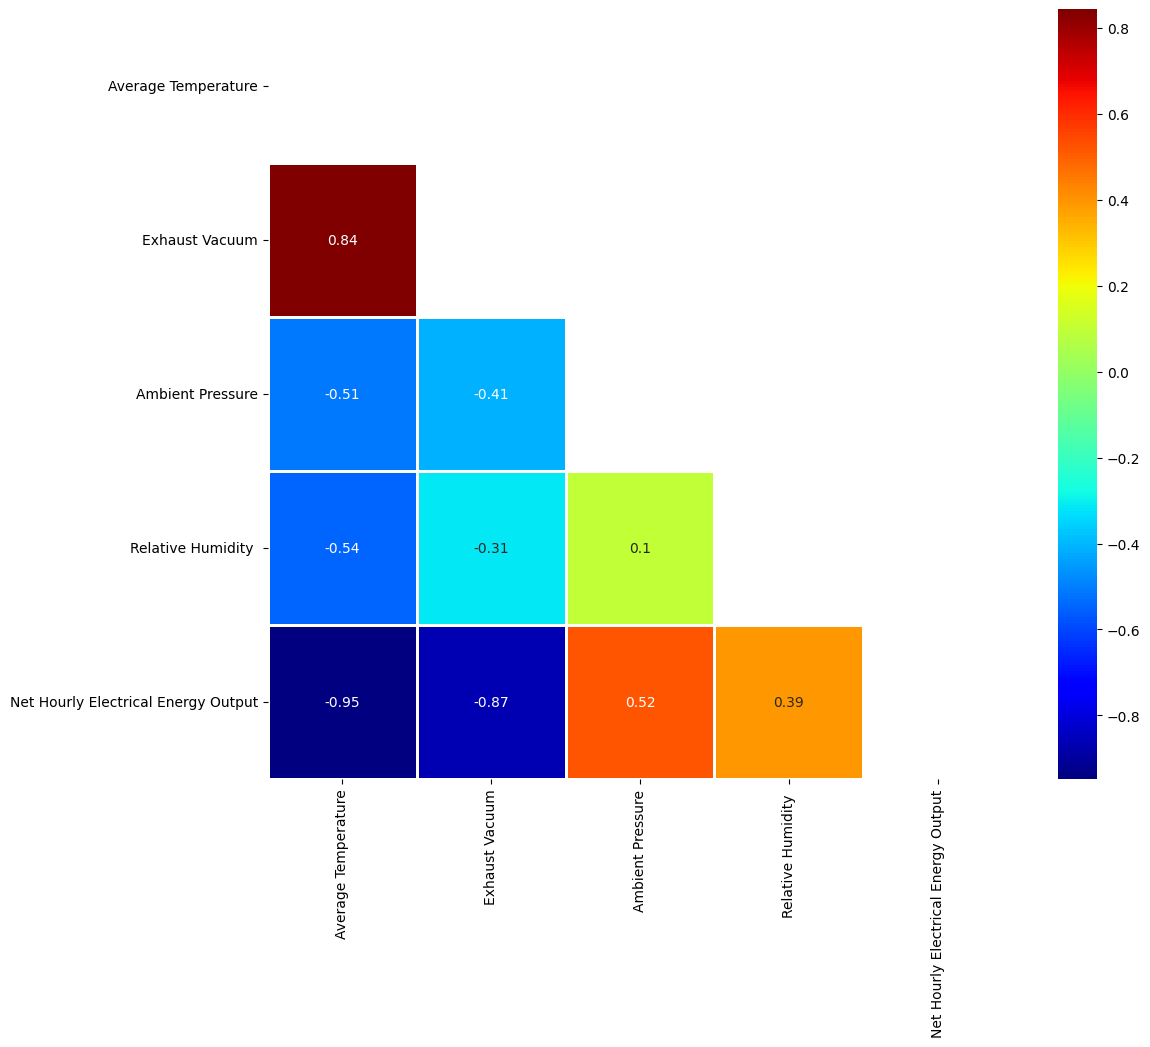

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
mask = np.zeros_like(df.corr(), dtype=bool) # Changed np.bool to bool
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

## 1.2.Data Visualization

In [11]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Histogram of the Target Column')

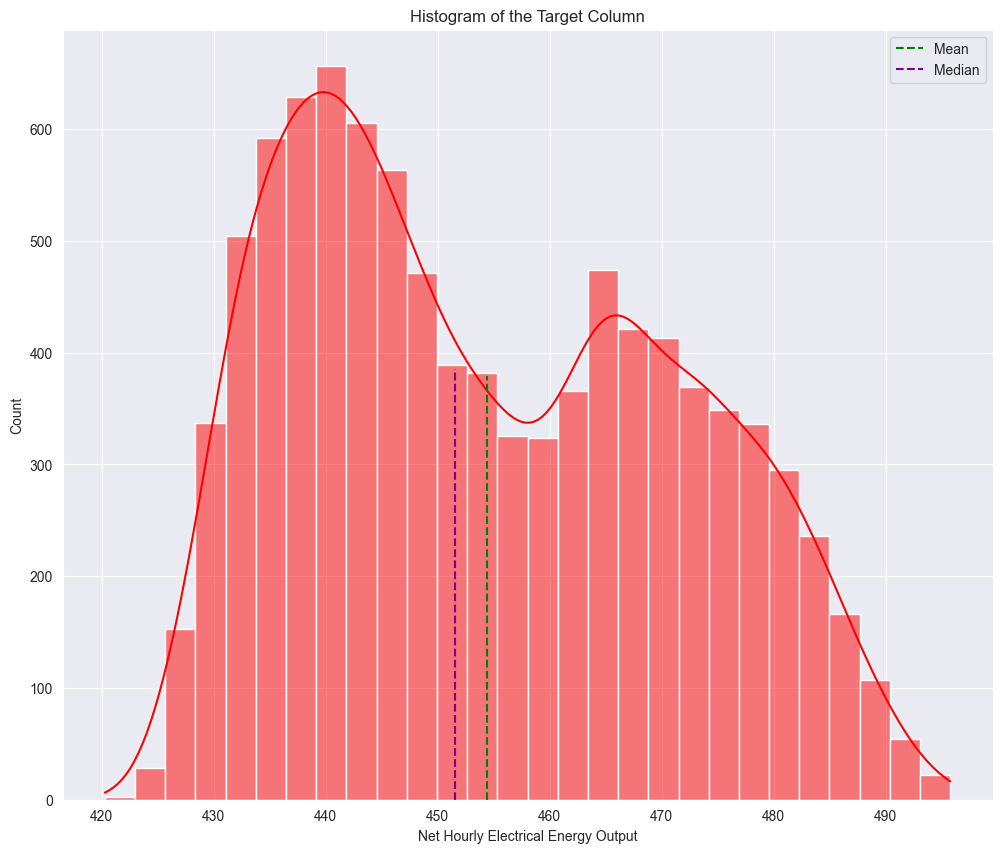

In [12]:
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="Net Hourly Electrical Energy Output",color="red",kde=True)
plt.axvline(x=df["Net Hourly Electrical Energy Output"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["Net Hourly Electrical Energy Output"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

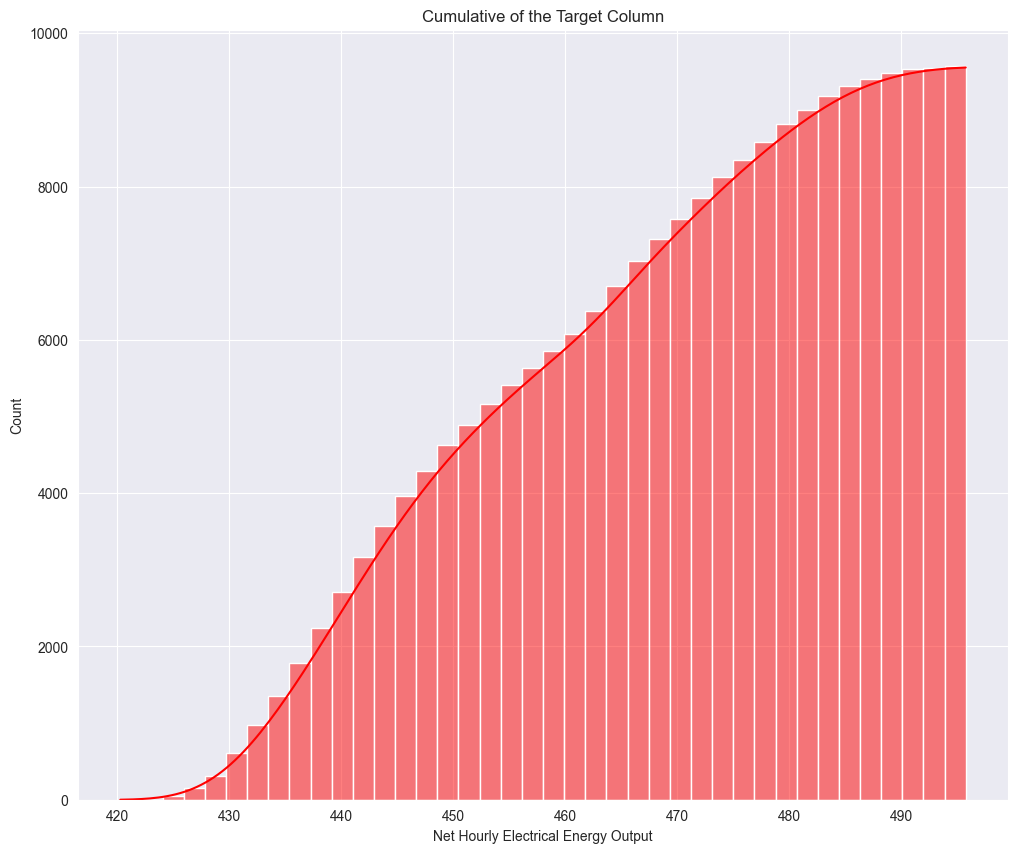

In [13]:
plt.figure(figsize = (12,10))
sns.histplot(df["Net Hourly Electrical Energy Output"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

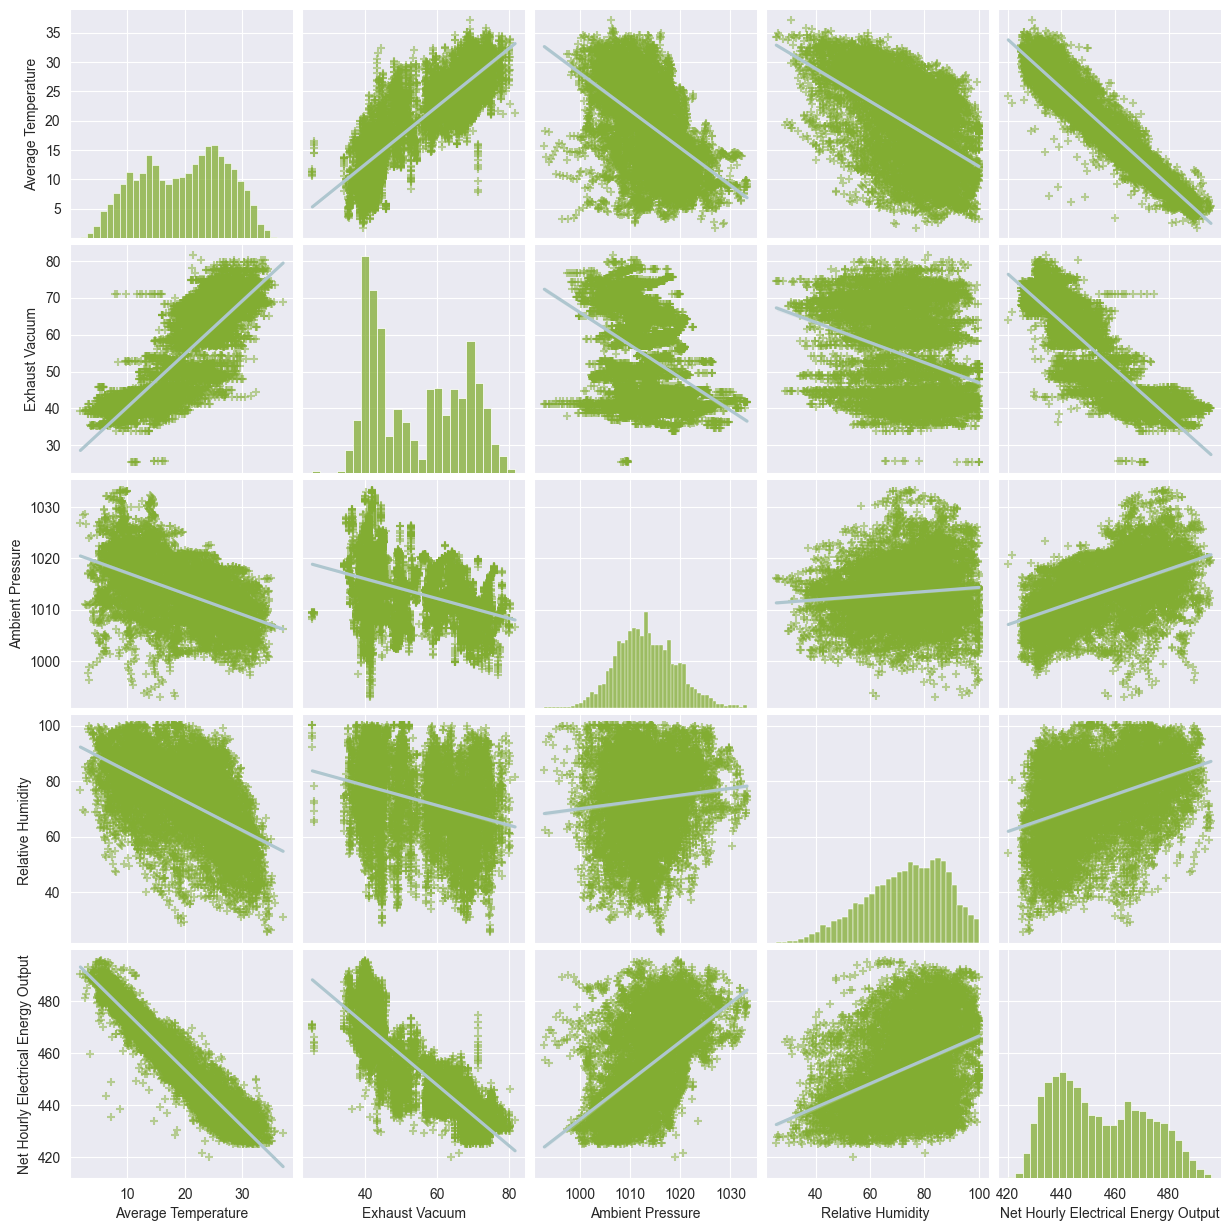

In [14]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},

                 diag_kws= {'color': '#82ad32'})

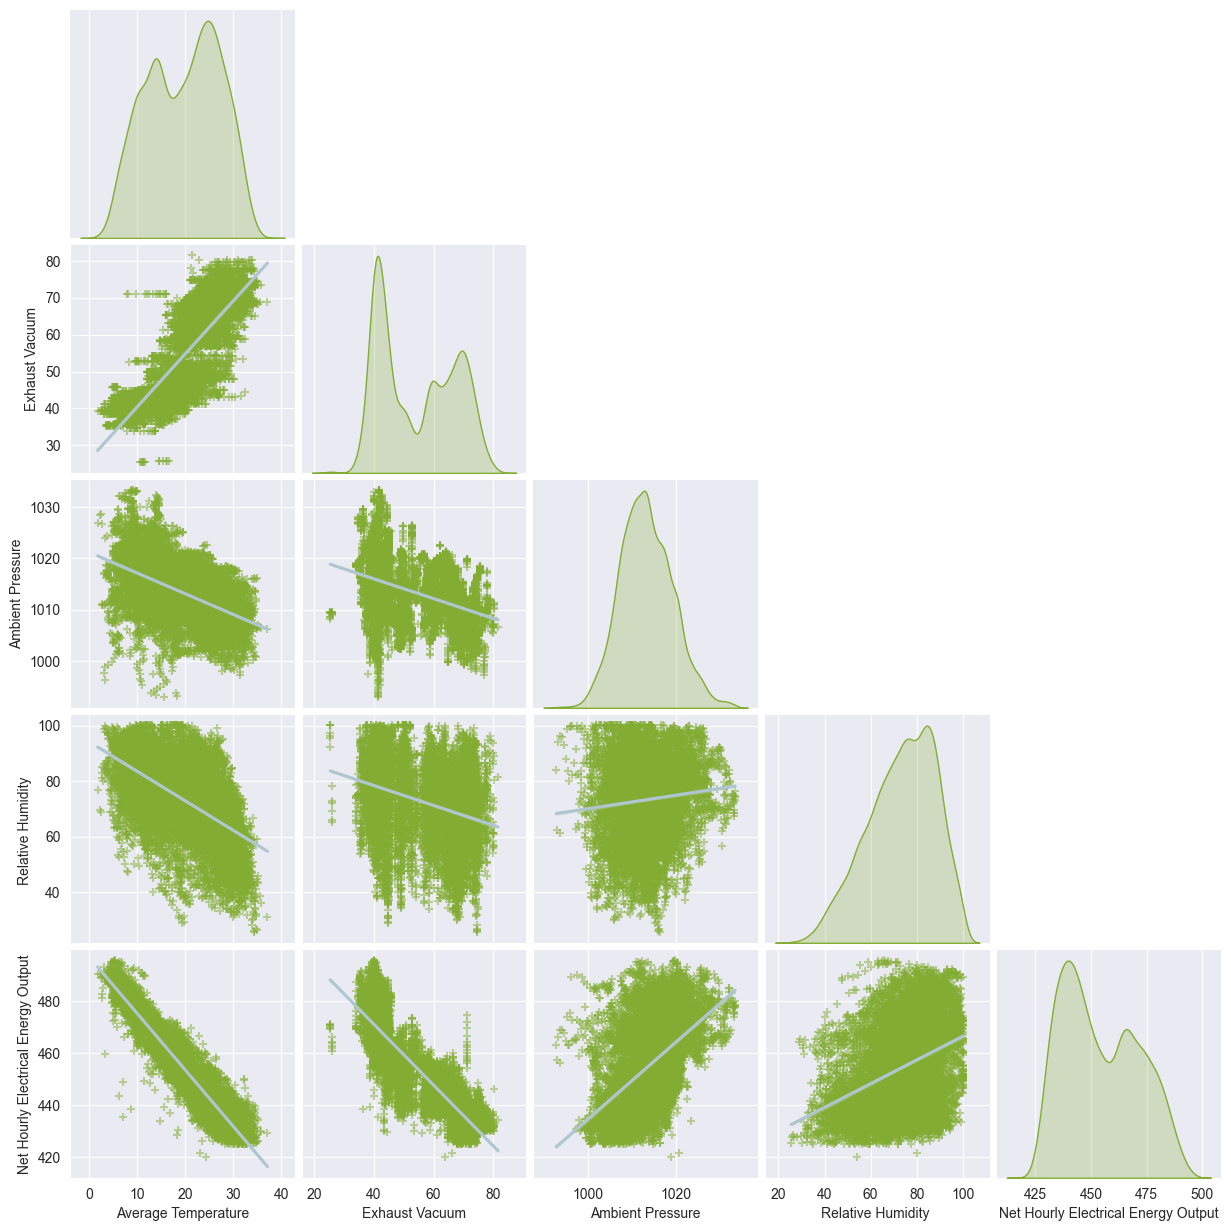

In [15]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

<Axes: xlabel='Average Temperature', ylabel='Net Hourly Electrical Energy Output'>

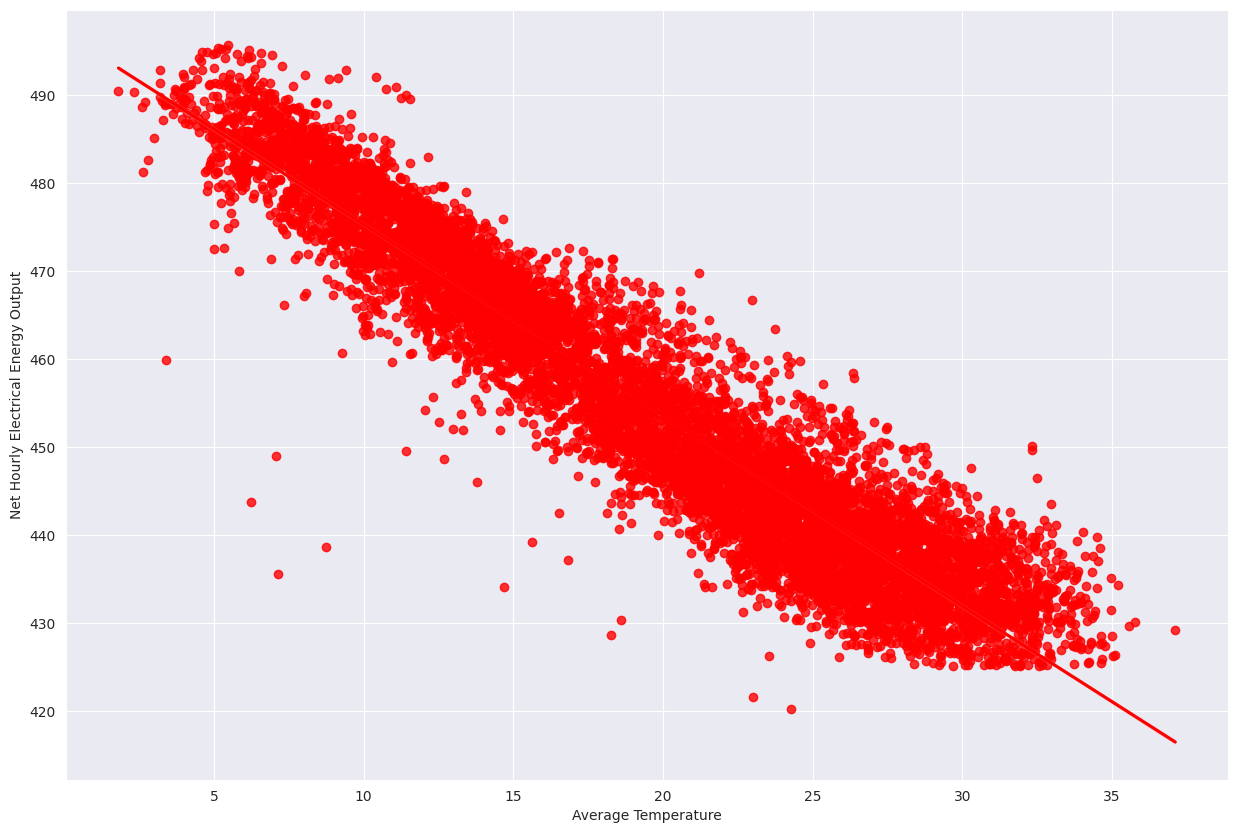

In [21]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="Average Temperature", y="Net Hourly Electrical Energy Output",color="red")

<Axes: xlabel='Exhaust Vacuum', ylabel='Net Hourly Electrical Energy Output'>

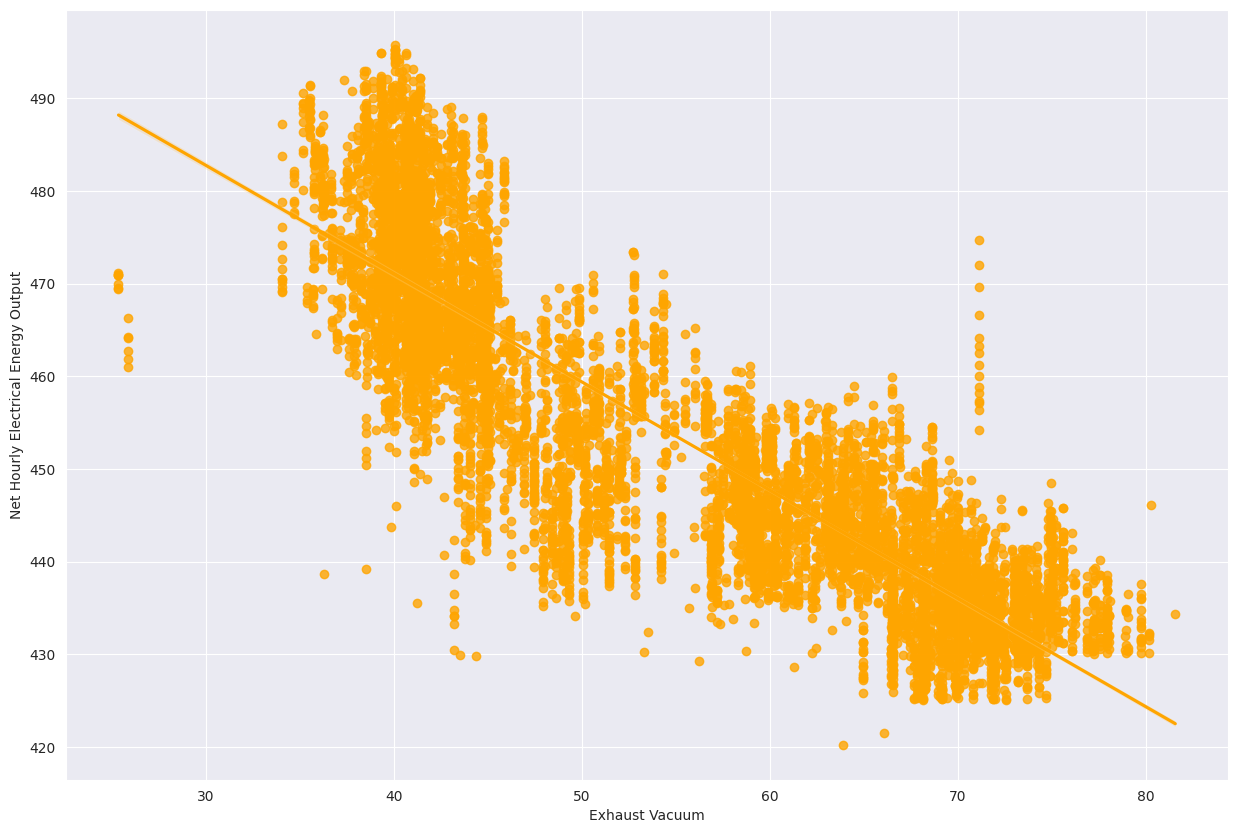

In [22]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="Exhaust Vacuum", y="Net Hourly Electrical Energy Output",color="orange")

<Axes: xlabel='Ambient Pressure', ylabel='Net Hourly Electrical Energy Output'>

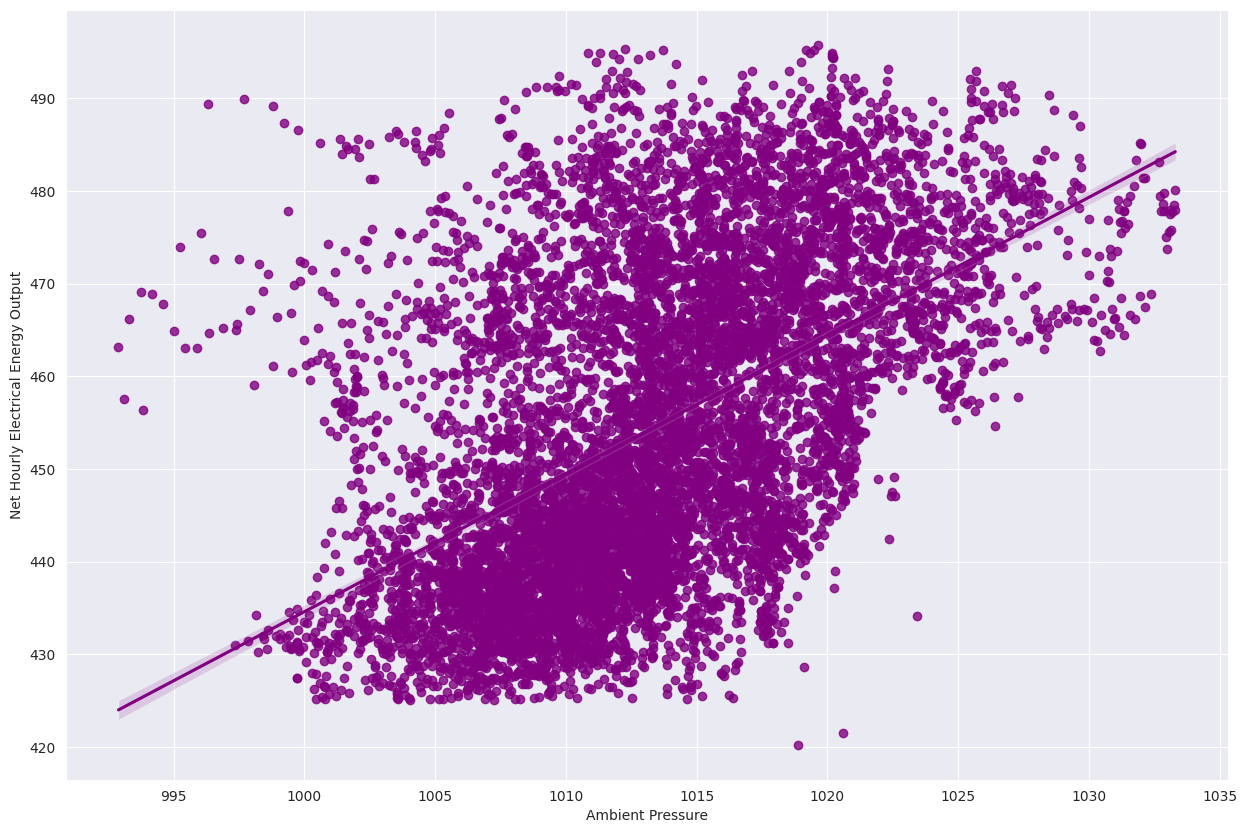

In [23]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="Ambient Pressure", y="Net Hourly Electrical Energy Output",color="purple")

## 2.PREPARING AND TRAINING THE MODEL

## 2.1. Preparing the Data for the Model

In [16]:
X = df.drop("Net Hourly Electrical Energy Output", axis=1).values
y = df["Net Hourly Electrical Energy Output"].values
print(X)
print(y)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]
[480.48 445.75 438.76 ... 465.96 450.93 451.67]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


<font color="green">
We need to make feature scaling before feeding the data to artificial neural networks

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[ 0.74805289  0.72006931 -0.32660017 -0.49711722]
 [ 0.86181948  1.26515721 -0.98521113  0.8181501 ]
 [ 0.93409473  1.52314975  0.32523844  0.80167494]
 ...
 [-0.22097078 -0.834965    0.36756563 -0.83554456]
 [ 0.94747903  1.14245344 -0.41971997 -0.45455637]
 [-1.77355014 -1.19049131  1.92520594  0.91837402]]
[[ 1.34499288  0.23869298 -1.28658067 -1.10532538]
 [ 0.81095912  1.36269098 -0.74140656  0.26485915]
 [-0.2437241  -0.73900436  1.99970178 -0.19713193]
 ...
 [-0.67068342 -1.15902881 -0.29951077 -0.10651852]
 [ 1.31420898  1.33752097 -0.87346737 -0.44288647]
 [-0.2611237  -0.27021304  0.37433797  1.10646548]]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [22]:

# Assuming you have train and test data as X_train, X_test, y_train, y_test
# Load or define your dataset
# X_train, X_test, y_train, y_test = ...

# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 2. Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 3. Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Alpha controls the sparsity
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")




Linear Regression Performance:
Mean Squared Error: 19.6081
R² Score: 0.9315

Ridge Regression Performance:
Mean Squared Error: 19.6081
R² Score: 0.9315

Lasso Regression Performance:
Mean Squared Error: 19.6671
R² Score: 0.9313


In [24]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 222.6 kB/s eta 0:09:22
   ---------------------------------------- 0.0/124.9 MB 281.8 kB/s eta 0:07:24
   ---------------------------------------- 0.1/124.9 MB 409.6 kB/s eta 0:05:05
   ---------------------------------------- 0.1/124.9 MB 438.1 kB/s eta 0:04:45
   ---------------------------------------- 0.1/124.9 MB 450.6 kB/s eta 0:04:37
   ---------------------------------------- 0.1/124.9 MB 473.7 kB/s eta 0:04:24
   ---------------------------------------- 0.2/124.9 MB 456.4 kB/s eta 0:04:34
   ---------------------------------------- 0.2/124.9 MB 456.4 kB/s eta 0:04:34
   ----------


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------------ -------------------- 60.6/124.9 MB 285.3 kB/s eta 0:03:46
   ------------------ -------------------- 60.6/124.9 MB 285.4 kB/s eta 0:03:46
   ------------------ -------------------- 60.6/124.9 MB 285.4 kB/s eta 0:03:46
   ------------------ -------------------- 60.7/124.9 MB 285.0 kB/s eta 0:03:46
   ------------------ -------------------- 60.7/124.9 MB 285.2 kB/s eta 0:03:46
   ------------------ -------------------- 60.7/124.9 MB 285.4 kB/s eta 0:03:46
   ------------------ -------------------- 60.7/124.9 MB 285.3 kB/s eta 0:03:46
   ------------------ -------------------- 60.7/124.9 MB 285.3 kB/s eta 0:03:46
   ------------------ -------------------- 60.7/124.9 MB 285.8 kB/s eta 0:03:45
   ------------------ -------------------- 60.7/124.9 MB 286.1 kB/s eta 0:03:45
   ------------------ -------------------- 60.7/124.9 MB 285.8 kB/s eta 0:03:45
   ------------------ -------------------- 60.7/124.9 MB 285.8 kB/s eta 0:03:45
   ------------------ ------------------

   ---------------------- ---------------- 73.0/124.9 MB 151.7 kB/s eta 0:05:43
   ---------------------- ---------------- 73.0/124.9 MB 152.1 kB/s eta 0:05:42
   ---------------------- ---------------- 73.0/124.9 MB 152.1 kB/s eta 0:05:42
   ---------------------- ---------------- 73.0/124.9 MB 151.4 kB/s eta 0:05:43
   ---------------------- ---------------- 73.0/124.9 MB 151.4 kB/s eta 0:05:43
   ---------------------- ---------------- 73.0/124.9 MB 151.4 kB/s eta 0:05:43
   ---------------------- ---------------- 73.0/124.9 MB 151.4 kB/s eta 0:05:43
   ---------------------- ---------------- 73.0/124.9 MB 151.0 kB/s eta 0:05:44
   ---------------------- ---------------- 73.0/124.9 MB 151.0 kB/s eta 0:05:44
   ---------------------- ---------------- 73.1/124.9 MB 151.3 kB/s eta 0:05:43
   ---------------------- ---------------- 73.1/124.9 MB 151.3 kB/s eta 0:05:43
   ---------------------- ---------------- 73.1/124.9 MB 151.3 kB/s eta 0:05:43
   ---------------------- --------------


XGBoost Regressor Performance:
Mean Squared Error: 14.2070
R² Score: 0.9504


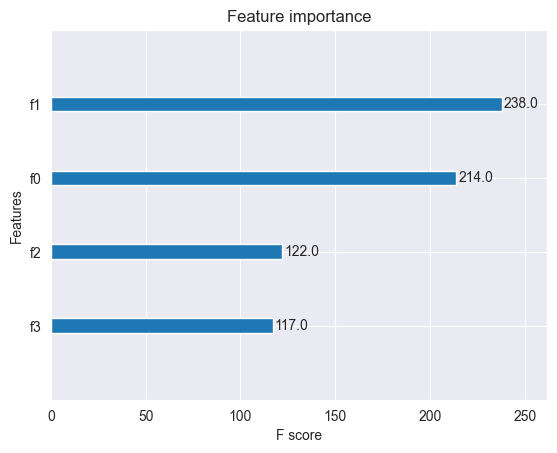

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit model
xgb_reg.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate Model
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Feature Importance Plot
xgb.plot_importance(xgb_reg)
plt.show()
